first do the setup

In [1]:

# Check python version
import sys
print('Python version: ',sys.version)
#Print TF version and GPU stats
import tensorflow as tf
print('TensorFlow version:', tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name), '', sep='\n')
!nvidia-smi
#install fastai
!pip install -Uqq fastai
#install pytorch
!pip install -Uqq torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
#import numpy
import numpy as np
#import torch
import torch
import torch.nn.functional as F
import torch.nn as nn

#import fastai
from fastai.imports import *
import fastai
from fastai.vision.all import *

from torchvision.models import *

Python version:  3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
TensorFlow version: 2.4.0
Found GPU at: /device:GPU:0

Mon Dec 28 13:20:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    32W /  70W |    227MiB / 15079MiB |      1%      Default |
|                               |                      |                 ERR! |
+-------------------------------+-----------

In [2]:
#parameters for the data
#use the imagewoof dataset
WOOF = True
#augment the data in a random basic way
DATA_AUGMENTATION = False
#erase parts of the images
ERASE_AUGMENTATION = False
#normalize the batch
BATCH_NORMALISATION = False

get the data

In [3]:
#first unpack the data and print some stats
if WOOF:
  path = untar_data(URLs.IMAGEWOOF)
else:
  path = untar_data(URLs.IMAGENETTE)

files = get_image_files(path/"train")
print("Training images: ", len(get_image_files(path/"train")),'(' ,np.round(len(get_image_files(path/"train"))*100/len(get_image_files(path)),2), '%)')
print("Validation images: ", len(get_image_files(path/"val")),'(' ,np.round(len(get_image_files(path/"val"))*100/len(get_image_files(path)),2), '%)')


Training images:  9025 ( 69.67 %)
Validation images:  3929 ( 30.33 %)


label data

In [4]:
#create dict to show better readable labels
if WOOF:
  lbl_dict = dict(
      n02086240= 'Shih-Tzu',
      n02087394= 'Rhodesian ridgeback',
      n02088364= 'Beagle',
      n02089973= 'English foxhound',
      n02093754= 'Australian terrier',
      n02096294= 'Border terrier',
      n02099601= 'Golden retriever',
      n02105641= 'Old English sheepdog',
      n02111889= 'Samoyed',
      n02115641= 'Dingo'
    )
else:
  lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
  )
#function to return human readable filenames
def label_func(fname):
  return lbl_dict[parent_label(fname)]

create model with its training and learning paarmeters

In [5]:
#define the used model (here an optimized xresnet50)
model = xresnext50(n_out=10, sa=True, pool=MaxPool)

#add further layers here
#model.fc = nn.Sequential(    
#)

#the used optimization function, here ranger
optimizer = partial(ranger, mom=.95, sqr_mom=.99, eps=1e-6)

#additional model callbacks, if needed
callbacks = []
callbacks = [SaveModelCallback()]

#the Learning Rate
LEARNING_RATE = 8e-3
EPOCHS = 20

test sth

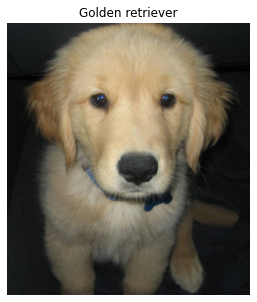

In [6]:
#get all the images
fnames = get_image_files(path)
#create a image
PILImage.create(fnames[0])
#create category pipeline
tfm = Pipeline([parent_label, lbl_dict.__getitem__, Categorize(vocab = lbl_dict.values())])
tfm(fnames[0])
#create splitter
split = GrandparentSplitter(valid_name='val')(fnames)
#create dataset
dset = Datasets(fnames, 
                [[PILImage.create], [parent_label, lbl_dict.__getitem__, Categorize(vocab = lbl_dict.values())]],
                splits=split)
dset.show(dset[0])

transform data


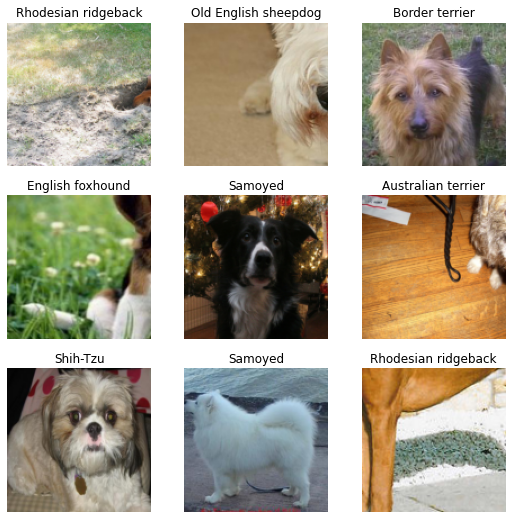

In [7]:
#add the item transformations (just resize and crop)
item_tfms = [RandomResizedCrop(128),ToTensor()]
#the batch transformations (mainly normalize)
batch_tfms = [IntToFloatTensor()]
if DATA_AUGMENTATION:
  add_tfms = []
  if ERASE_AUGMENTATION:
    add_tfms=[RandomErasing()]
  batch_tfms = [IntToFloatTensor(),*aug_transforms(mult=2,xtra_tfms=add_tfms)]
if BATCH_NORMALISATION:
  batch_tfms.append(Normalize.from_stats(*imagenet_stats))
      
#create the dataloader
dls = dset.dataloaders(after_item=item_tfms, after_batch=batch_tfms, bs=64)
dls.show_batch()

Learn

epoch,train_loss,valid_loss,accuracy,time
0,2.017612,1.994188,0.301603,01:27
1,1.970864,2.497484,0.237210,01:24
2,1.872652,2.032187,0.249682,01:24
3,1.788971,1.627406,0.419445,01:25
4,1.694213,1.739550,0.383813,01:24
5,1.537308,1.377830,0.516416,01:25
6,1.393254,1.811428,0.419700,01:25
7,1.297520,1.120418,0.615678,01:25
8,1.189039,1.268183,0.555103,01:25
9,1.090734,0.960451,0.677526,01:24


Better model found at epoch 0 with valid_loss value: 1.9941884279251099.


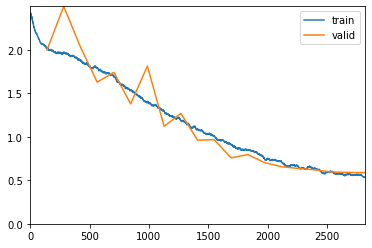

Better model found at epoch 3 with valid_loss value: 1.6274058818817139.
Better model found at epoch 5 with valid_loss value: 1.3778300285339355.
Better model found at epoch 7 with valid_loss value: 1.120417594909668.
Better model found at epoch 9 with valid_loss value: 0.9604510068893433.
Better model found at epoch 11 with valid_loss value: 0.7568013668060303.
Better model found at epoch 13 with valid_loss value: 0.702718198299408.
Better model found at epoch 14 with valid_loss value: 0.6559460163116455.
Better model found at epoch 15 with valid_loss value: 0.6359070539474487.
Better model found at epoch 16 with valid_loss value: 0.6200175285339355.
Better model found at epoch 17 with valid_loss value: 0.595221221446991.
Better model found at epoch 18 with valid_loss value: 0.59007728099823.
Better model found at epoch 19 with valid_loss value: 0.5878382921218872.


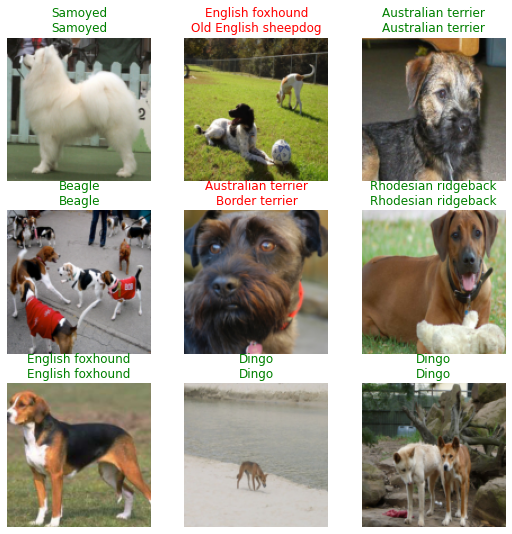

In [8]:
#add teh csv logger
callbacks.extend([CSVLogger(fname='model_logs.csv'),ShowGraphCallback()])
#define the learner
learn = Learner(dls, model, opt_func=optimizer, metrics=accuracy, cbs=callbacks)

#do the train
learn.fit_one_cycle(EPOCHS, LEARNING_RATE)
#print the results
learn.show_results()


In [9]:
#get the learning rate
#learn.lr_find()

And the code to keep the colab open

In [10]:
#cl = () => {console.log('refreshing'); document.querySelector('colab-connect-button').click()}